In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Accuracy: 96.43%


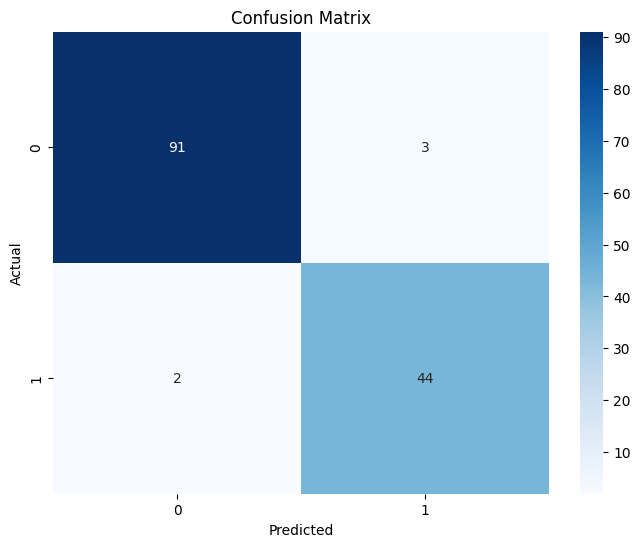

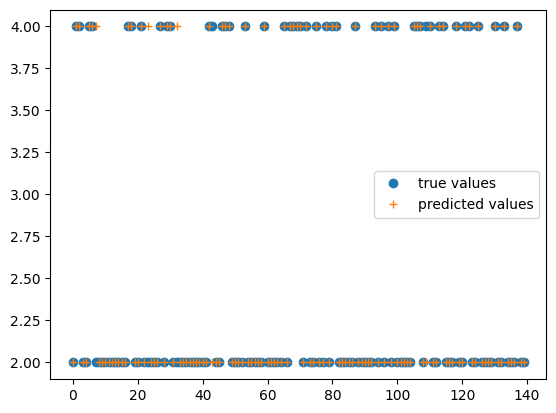

In [ ]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cancer Detection/cell_samples.csv')
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset = dataset.fillna(dataset.mean())
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.2f}%')
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plotting the result
plt.plot(y_test, 'o', label="true values")
plt.plot(y_pred, '+', label="predicted values")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better neural network convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a neural network classifier
# You might need to tune the hyperparameters like hidden_layer_sizes, alpha, etc., based on your data
clf = MLPClassifier(hidden_layer_sizes=(100, ), alpha=0.0001, max_iter=1000, random_state=42)

# Training the neural network
clf.fit(X_train_scaled, y_train)

# Predicting on the test set
predictions = clf.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Printing classification report
print(classification_report(y_test, predictions))


Accuracy: 0.96
              precision    recall  f1-score   support

           2       0.96      0.98      0.97        95
           4       0.95      0.91      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

